In [ ]:
# imports -- change ip and fingerprint between hosts
import pandas as pd
import pyexasol

host = ''   # Don't forget to change the fingerprint
user = 'sys'
password = 'exasol'

# Connect to Exasol
conn = pyexasol.connect(dsn=host, 
                        user=user, 
                        password=password, 
                        debug=False, 
                        protocol_version=pyexasol.PROTOCOL_V1)

In [3]:
# List of AOL tables and weather data
tables = [
    "AOL_SCHEMA.DMOZ_CATEGORIES",
    "AOL_SCHEMA.URLDIM",
    "AOL_SCHEMA.URL_CATEGORY",
    "AOL_SCHEMA.FACTS",
    "AOL_SCHEMA.QUERYDIM",
    "AOL_SCHEMA.WEATHER_EVENTS"
]

# Describe each table and print the results
for table in tables:
    print(f"Describing table: {table}")
    describe_query = f"DESCRIBE {table}"
    result = conn.execute(describe_query)
    for row in result:
        print(row)
    print("\n")  # Add space between table descriptions


Describing table: AOL_SCHEMA.DMOZ_CATEGORIES
('CATID', 'DECIMAL(36,0)', 'TRUE', 'FALSE')
('TOPIC', 'VARCHAR(512) UTF8', 'TRUE', 'FALSE')
('TITLE', 'VARCHAR(256) UTF8', 'TRUE', 'FALSE')
('DESCRIPTION', 'VARCHAR(2000000) UTF8', 'TRUE', 'FALSE')
('LASTUPDATE', 'VARCHAR(20) UTF8', 'TRUE', 'FALSE')
('LETTERBAR', 'VARCHAR(1) UTF8', 'TRUE', 'FALSE')
('FATHERID', 'DECIMAL(36,0)', 'TRUE', 'FALSE')
('TOPIC_1', 'VARCHAR(100) UTF8', 'TRUE', 'FALSE')
('TOPIC_2', 'VARCHAR(100) UTF8', 'TRUE', 'FALSE')
('TOPIC_3', 'VARCHAR(100) UTF8', 'TRUE', 'FALSE')
('TOPIC_4', 'VARCHAR(100) UTF8', 'TRUE', 'FALSE')
('TOPIC_5', 'VARCHAR(100) UTF8', 'TRUE', 'FALSE')
('TOPIC_6', 'VARCHAR(100) UTF8', 'TRUE', 'FALSE')
('TOPIC_7', 'VARCHAR(111) UTF8', 'TRUE', 'FALSE')
('TOPIC_8', 'VARCHAR(100) UTF8', 'TRUE', 'FALSE')
('TOPIC_9', 'VARCHAR(100) UTF8', 'TRUE', 'FALSE')
('TOPIC_10', 'VARCHAR(103) UTF8', 'TRUE', 'FALSE')
('TOPIC_11', 'VARCHAR(100) UTF8', 'TRUE', 'FALSE')
('TOPIC_12', 'VARCHAR(107) UTF8', 'TRUE', 'FALSE')
('TOP

In [5]:
query = """
SELECT
    w.EVENT_TYPE,
    c.TITLE AS URL_TOPIC,
    SUM(CASE WHEN f.CLICK THEN 1 ELSE 0 END) AS TOTAL_CLICKS
FROM
    AOL_SCHEMA.WEATHER_EVENTS w
JOIN
    AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
JOIN
    AOL_SCHEMA.URL_CATEGORY uc ON f.URLID = uc.URLID
JOIN
    AOL_SCHEMA.DMOZ_CATEGORIES c ON uc.CATEGORYID = c.CATID
GROUP BY GROUPING SETS ((w.EVENT_TYPE, c.TITLE), (w.EVENT_TYPE), (c.TITLE));
"""
# print(conn.export_to_pandas(query))
result = conn.execute(query)
for row in result:
    print(row)

('Debris Flow', 'London_Bombings,_2005', 2)
('Storm Surge/Tide', 'London_Bombings,_2005', 1)
('Heavy Snow', 'London_Bombings,_2005', 6)
('Winter Weather', 'London_Bombings,_2005', 1)
('Blizzard', 'London_Bombings,_2005', 3)
('High Wind', 'London_Bombings,_2005', 11)
('Hail', 'London_Bombings,_2005', 506)
('Thunderstorm Wind', 'London_Bombings,_2005', 309)
('Funnel Cloud', 'London_Bombings,_2005', 10)
('Strong Wind', 'London_Bombings,_2005', 1)
('Heat', 'London_Bombings,_2005', 1)
('Winter Storm', 'London_Bombings,_2005', 1)
('Flood', 'London_Bombings,_2005', 13)
('Waterspout', 'London_Bombings,_2005', 1)
('Wildfire', 'London_Bombings,_2005', 7)
('Marine Thunderstorm Wind', 'London_Bombings,_2005', 12)
('Tornado', 'London_Bombings,_2005', 33)
('WINTER WEATHER', 'London_Bombings,_2005', 1)
('Lightning', 'London_Bombings,_2005', 13)
('Flash Flood', 'London_Bombings,_2005', 20)
('Marine Hail', 'London_Bombings,_2005', 1)
('Heavy Rain', 'London_Bombings,_2005', 23)
('Avalanche', 'London_Bom

Which categories of URLs are most frequently clicked during severe weather events, and how do click rates vary by region?

In [3]:
query = """
SELECT
    w.REGION,
    c.TOPIC,
    COUNT(f.CLICK) AS CLICK_COUNT,
    SUM(CASE WHEN f.CLICK THEN 1 ELSE 0 END) AS TOTAL_CLICKS
FROM
    AOL_SCHEMA.FACTS f
JOIN
    AOL_SCHEMA.WEATHER_EVENTS w ON f.TIMEID = w.BEGIN_DAY
JOIN
    AOL_SCHEMA.URL_CATEGORY uc ON f.URLID = uc.URLID
JOIN
    AOL_SCHEMA.DMOZ_CATEGORIES c ON uc.CATEGORYID = c.CATID
GROUP BY GROUPING SETS ((w.REGION, c.TOPIC), (w.REGION), (c.TOPIC));
"""
print(conn.export_to_pandas(query))
# result = conn.execute(query)
# for row in result:
#     print(row)

      REGION                                              TOPIC  CLICK_COUNT  \
0      Texas  Top/Business/Agriculture_and_Forestry/Equipmen...           29   
1      Texas     Top/Arts/Visual_Arts/Painting/Painters/Pop_Art           64   
2      Texas             Top/Games/Gambling/Charitable_Gambling          130   
3      Texas  Top/Regional/North_America/United_States/India...          206   
4      Texas  Top/Regional/North_America/United_States/India...          260   
...      ...                                                ...          ...   
34472    NaN      Top/Regional/Middle_East/Syria/Maps_and_Views          978   
34473    NaN  Top/Regional/Europe/United_Kingdom/England/Lon...          807   
34474    NaN  Top/Society/Death/Death_Care/Cemeteries/Image_...         1956   
34475    NaN  Top/World/Español/Negocios/Agricultura_y_ganad...          627   
34476    NaN    Top/World/Esperanto/Komputado/Interreto/Serĉado          589   

       TOTAL_CLICKS  
0                

Which domains are clicked most frequently in regions experiencing weather events?

In [7]:
query = """
SELECT
    w.REGION,
    u.THISDOMAIN,
    COUNT(f.URLID) AS CLICK_COUNT
FROM
    AOL_SCHEMA.WEATHER_EVENTS w
JOIN
    AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
JOIN
    AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
WHERE
    f.CLICK = TRUE
GROUP BY GROUPING SETS ((w.REGION, u.THISDOMAIN), (w.REGION), (u.THISDOMAIN));
"""
# print(conn.export_to_pandas(query))
result = conn.execute(query)
for row in result:
    print(row)

('Texas', 'summitcommunitybank', 103)
('Texas', 'citysearch', 45)
('Texas', 'twomblynursery', 6)
('Texas', 'stumbleupon', 13)
('Texas', 'ebay.co', 29)
('Texas', 'colmwilkinson', 10)
('Texas', 'genealogytoday', 13)
('Texas', 'madeforsuccess', 9)
('Texas', 'aperfectimpression', 124)
('Texas', 'fuckme', 64)
('Texas', 'raymondjames', 10)
('Texas', 'burncoose.co', 6)
('Texas', 'bilkent.edu', 76)
('Texas', 'wiley', 9)
('Texas', 'ssa', 13)
('Texas', 'psalmistry', 9)
('Texas', 'sharesong', 18)
('Texas', 'searchgals', 9)
('Texas', 'avsforum', 9)
('Texas', 'brainyquote', 73)
('Texas', 'indstate', 29)
('Texas', 'marilynmanson', 124)
('Texas', 'triedntruetattoo', 57)
('Texas', 'fu-fme', 64)
('Texas', 'anewlife', 9)
('Texas', 'idolonfox', 10)
('Texas', 'humanadental', 101)
('Texas', 'stars21', 10)
('Texas', 'jtech', 50)
('Texas', 'freeweblayouts', 103)
('Texas', 'splut', 76)
('Texas', 'villagepres', 29)
('Texas', 'ca', 111)
('Texas', 'flickr', 64)
('Texas', 'about', 82)
('Texas', 'iuma', 124)
('Tex

In [20]:
query = """
WITH RegionDomainClicks AS (
    SELECT
        w.REGION,
        u.THISDOMAIN,
        COUNT(f.URLID) AS CLICK_COUNT
    FROM
        AOL_SCHEMA.WEATHER_EVENTS w
    JOIN
        AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
    JOIN
        AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
    WHERE
        f.CLICK = TRUE -- SLICE: Focus on clicked URLs
    GROUP BY GROUPING SETS ((w.REGION, u.THISDOMAIN), (w.REGION), (u.THISDOMAIN)) -- GROUPING SETS: Multiple aggregation levels
),
RankedDomains AS (
    SELECT
        REGION,
        THISDOMAIN,
        CLICK_COUNT,
        RANK() OVER (PARTITION BY REGION ORDER BY CLICK_COUNT DESC) AS DOMAIN_RANK -- PARTITION BY: Rank domains within each region
    FROM
        RegionDomainClicks
    WHERE
        THISDOMAIN IS NOT NULL -- DICE: Ensure domain data is valid
)
SELECT
    REGION,
    THISDOMAIN AS MOST_CLICKED_DOMAIN,
    CLICK_COUNT
FROM
    RankedDomains
WHERE
    DOMAIN_RANK = 1; -- Filter for the most-clicked domain per region
"""
# print(conn.export_to_pandas(query))
result = conn.execute(query)
for row in result:
    print(row)

('Alabama', 'nau', 204)
('Alaska', 'about', 27)
('American samoa', 'nintendo', 3)
('American samoa', 'lib.rochester', 3)
('Arizona', 'yahoo', 20)
('Arkansas', 'ca', 145)
('Atlantic north', 'yahoo', 28)
('Atlantic south', 'about', 7)
('California', 'yahoo', 48)
('Colorado', 'searchgals', 37)
('Connecticut', 'about', 22)
('Delaware', 'about', 7)
('District of columbia', 'ikea', 2)
('E pacific', 'citysearch', 3)
('E pacific', 'about', 3)
('E pacific', 'wpxi', 3)
('E pacific', 'ucf', 3)
('Florida', 'yahoo', 86)
('Georgia', 'nau', 177)
('Guam', 'summitcommunitybank', 1)
('Guam', 'freeweblayouts', 1)
('Guam', 'parkinson', 1)
('Guam', 'nobodysmiling', 1)
('Guam', 'ics.purdue', 1)
('Guam', 'seatow', 1)
('Gulf of alaska', 'ebay.co', 1)
('Gulf of alaska', 'indstate', 1)
('Gulf of alaska', 'villagepres', 1)
('Gulf of alaska', 'ebay', 1)
('Gulf of alaska', 'deere', 1)
('Gulf of mexico', 'the-antiaging-site', 12)
('Hawaii', 'yahoo', 15)
('Hawaii', 'nau', 15)
('Hawaii waters', 'sharesong', 2)
('Idah

In [24]:
query = """
WITH ClickedDomains AS (
    SELECT
        w.REGION,
        u.THISDOMAIN,
        u.URL,
        COUNT(f.URLID) AS CLICK_COUNT
    FROM
        AOL_SCHEMA.WEATHER_EVENTS w
    JOIN
        AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
    JOIN
        AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
    WHERE
        f.CLICK = TRUE AND (u.THISDOMAIN IS NOT NULL OR u.URL IS NOT NULL)
    GROUP BY ROLLUP(w.REGION, u.THISDOMAIN, u.URL)
),
RankedDomains AS (
    SELECT
        REGION,
        THISDOMAIN,
        URL,
        CLICK_COUNT,
        ROW_NUMBER() OVER (PARTITION BY REGION ORDER BY CLICK_COUNT DESC) AS RANK
    FROM
        ClickedDomains
    WHERE
        THISDOMAIN IS NOT NULL OR URL IS NOT NULL
)
SELECT
    REGION,
    THISDOMAIN,
    URL,
    CLICK_COUNT
FROM
    RankedDomains
WHERE
    RANK = 1
ORDER BY REGION;
"""
# print(conn.export_to_pandas(query))
result = conn.execute(query)
for row in result:
    print(row)

('Alabama', 'nau', 'http://www.nau.edu', 204)
('Alaska', 'about', None, 27)
('American samoa', 'nintendo', 'http://www.nintendo.com', 3)
('Arizona', 'yahoo', None, 20)
('Arkansas', 'ca', 'http://gocalif.ca.gov', 145)
('Atlantic north', 'yahoo', None, 28)
('Atlantic south', 'about', None, 7)
('California', 'yahoo', None, 48)
('Colorado', 'searchgals', 'http://www.searchgals.com', 37)
('Connecticut', 'about', None, 22)
('Delaware', 'about', None, 7)
('District of columbia', 'ikea', 'http://www.ikea.com', 2)
('E pacific', 'citysearch', 'http://pittsburgh.citysearch.com', 3)
('Florida', 'yahoo', 'http://mail.yahoo.com', 86)
('Georgia', 'nau', 'http://www.nau.edu', 177)
('Guam', 'summitcommunitybank', 'http://www.summitcommunitybank.com', 1)
('Gulf of alaska', 'ebay.co', 'http://www.ebay.co.uk', 1)
('Gulf of mexico', 'the-antiaging-site', 'http://www.the-antiaging-site.com', 12)
('Hawaii', 'nau', 'http://www.nau.edu', 15)
('Hawaii waters', 'sharesong', 'http://www.sharesong.org', 2)
('Idaho

In [26]:
query = """
WITH ClickedDomains AS (
    SELECT
        w.REGION,
        w.EVENT_TYPE,
        w.BEGIN_DATE_TIME,
        u.THISDOMAIN,
        u.URL,
        COUNT(f.URLID) AS CLICK_COUNT
    FROM
        AOL_SCHEMA.WEATHER_EVENTS w
    JOIN
        AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
    JOIN
        AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
    WHERE
        f.CLICK = TRUE AND (u.THISDOMAIN IS NOT NULL OR u.URL IS NOT NULL)
    GROUP BY ROLLUP(w.REGION, w.EVENT_TYPE, w.BEGIN_DATE_TIME, u.THISDOMAIN, u.URL)
),
RankedDomains AS (
    SELECT
        REGION,
        EVENT_TYPE,
        BEGIN_DATE_TIME,
        THISDOMAIN,
        URL,
        CLICK_COUNT,
        ROW_NUMBER() OVER (PARTITION BY REGION, EVENT_TYPE ORDER BY CLICK_COUNT DESC) AS RANK
    FROM
        ClickedDomains
    WHERE
        THISDOMAIN IS NOT NULL OR URL IS NOT NULL
)
SELECT
    REGION,
    EVENT_TYPE,
    BEGIN_DATE_TIME,
    THISDOMAIN,
    URL,
    CLICK_COUNT
FROM
    RankedDomains
WHERE
    RANK = 1
ORDER BY REGION, EVENT_TYPE, BEGIN_DATE_TIME;
"""
# print(conn.export_to_pandas(query))
result = conn.execute(query)
for row in result:
    print(row)

('Alabama', 'Flash Flood', '2006-03-20 18:45:00.000000', 'nau', 'http://www.nau.edu', 3)
('Alabama', 'Flood', '2006-01-18 14:20:00.000000', 'citysearch', 'http://pittsburgh.citysearch.com', 1)
('Alabama', 'Funnel Cloud', '2006-03-20 17:55:00.000000', 'nau', 'http://www.nau.edu', 3)
('Alabama', 'Hail', '2006-04-20 17:08:00.000000', 'nau', 'http://www.nau.edu', 6)
('Alabama', 'Heat', '2006-01-02 13:00:00.000000', 'the-antiaging-site', 'http://www.the-antiaging-site.com', 1)
('Alabama', 'Heavy Rain', '2006-02-03 00:00:00.000000', 'triedntruetattoo', 'http://www.triedntruetattoo.com', 1)
('Alabama', 'Heavy Snow', '2006-02-11 16:00:00.000000', 'twomblynursery', 'http://www.twomblynursery.com', 1)
('Alabama', 'Lightning', '2006-04-18 18:10:00.000000', 'citysearch', 'http://pittsburgh.citysearch.com', 1)
('Alabama', 'Strong Wind', '2006-03-09 14:15:00.000000', 'ca', 'http://gocalif.ca.gov', 1)
('Alabama', 'Thunderstorm Wind', '2006-03-20 17:30:00.000000', 'nau', 'http://www.nau.edu', 3)
('Ala

In [27]:
query = """
WITH ClickedDomains AS (
    SELECT
        w.REGION,
        w.EVENT_TYPE,
        w.BEGIN_DATE_TIME,
        u.THISDOMAIN,
        u.URL,
        COUNT(f.URLID) AS CLICK_COUNT
    FROM
        AOL_SCHEMA.WEATHER_EVENTS w
    JOIN
        AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
    JOIN
        AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
    WHERE
        f.CLICK = TRUE 
        AND (u.THISDOMAIN IS NOT NULL OR u.URL IS NOT NULL)
        AND w.BEGIN_DATE_TIME BETWEEN '2006-03-01 00:00:00' AND '2006-05-31 23:59:59'
    GROUP BY ROLLUP(w.REGION, w.EVENT_TYPE, w.BEGIN_DATE_TIME, u.THISDOMAIN, u.URL)
),
RankedDomains AS (
    SELECT
        REGION,
        EVENT_TYPE,
        BEGIN_DATE_TIME,
        THISDOMAIN,
        URL,
        CLICK_COUNT,
        ROW_NUMBER() OVER (PARTITION BY REGION, EVENT_TYPE ORDER BY CLICK_COUNT DESC) AS RANK
    FROM
        ClickedDomains
    WHERE
        THISDOMAIN IS NOT NULL OR URL IS NOT NULL
)
SELECT
    REGION,
    EVENT_TYPE,
    BEGIN_DATE_TIME,
    THISDOMAIN,
    URL,
    CLICK_COUNT
FROM
    RankedDomains
WHERE
    RANK = 1
ORDER BY REGION, EVENT_TYPE, BEGIN_DATE_TIME;
"""
# print(conn.export_to_pandas(query))
result = conn.execute(query)
for row in result:
    print(row)

('Alabama', 'Flash Flood', '2006-03-20 18:45:00.000000', 'nau', 'http://www.nau.edu', 3)
('Alabama', 'Funnel Cloud', '2006-03-20 17:55:00.000000', 'nau', 'http://www.nau.edu', 3)
('Alabama', 'Hail', '2006-04-20 17:08:00.000000', 'nau', 'http://www.nau.edu', 6)
('Alabama', 'Lightning', '2006-04-18 18:10:00.000000', 'citysearch', 'http://pittsburgh.citysearch.com', 1)
('Alabama', 'Strong Wind', '2006-03-09 14:15:00.000000', 'ca', 'http://gocalif.ca.gov', 1)
('Alabama', 'Thunderstorm Wind', '2006-03-20 17:30:00.000000', 'nau', 'http://www.nau.edu', 3)
('Alabama', 'Tornado', '2006-04-07 21:00:00.000000', 'about', 'http://daysofourlives.about.com', 2)
('Alaska', 'Blizzard', '2006-04-15 14:35:00.000000', 'yahoo', 'http://mail.yahoo.com', 2)
('Alaska', 'Cold/Wind Chill', '2006-03-01 17:53:00.000000', 'nintendo', 'http://www.nintendo.com', 2)
('Alaska', 'Flood', '2006-05-13 16:00:00.000000', 'colmwilkinson', 'http://www.colmwilkinson.com', 1)
('Alaska', 'Heavy Snow', '2006-03-13 11:15:00.00000

Which domains were most clicked during weather events in different regions between March 1, 2006, and May 31, 2006, and how do these clicks correlate with specific weather event types?

Operators Used in the Query:
1. SLICE
The SLICE operator is implemented using the WHERE clause:
Date Filter: w.BEGIN_DATE_TIME BETWEEN '2006-03-01 00:00:00' AND '2006-05-31 23:59:59' narrows the data to the specified period.
Click Filter: f.CLICK = TRUE focuses only on rows where a click occurred.
Domain/URL Presence: (u.THISDOMAIN IS NOT NULL OR u.URL IS NOT NULL) ensures only meaningful domain or URL values are included.
2. DICE
DICE is implicitly applied when selecting specific dimensions for analysis, namely REGION, EVENT_TYPE, BEGIN_DATE_TIME, THISDOMAIN, and URL. These are the axes of interest, and the data is diced to focus on them while filtering out irrelevant attributes.
3. ROLLUP
The ROLLUP operator in the ClickedDomains CTE creates hierarchical aggregations for the groupings:
Dimensions: ROLLUP(w.REGION, w.EVENT_TYPE, w.BEGIN_DATE_TIME, u.THISDOMAIN, u.URL)
Outputs:
Aggregates by REGION, EVENT_TYPE, BEGIN_DATE_TIME, THISDOMAIN, and URL.
Subtotals for higher levels of the hierarchy (e.g., just REGION or REGION + EVENT_TYPE).
A grand total for all regions, events, and domains.
4. PARTITION BY
The PARTITION BY clause in the ROW_NUMBER() function allows ranking within each combination of REGION and EVENT_TYPE:
Clause: PARTITION BY REGION, EVENT_TYPE
Purpose: Ensures that rankings reset for each region and event type, identifying the top-clicked domain for every partition.

In [31]:
query = """
WITH ClickedDomains AS (
    SELECT
        w.REGION,
        w.EVENT_TYPE,
        w.BEGIN_DATE_TIME,
        u.THISDOMAIN,
        u.URL,
        COUNT(f.URLID) AS CLICK_COUNT
    FROM
        AOL_SCHEMA.WEATHER_EVENTS w
    JOIN
        AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
    JOIN
        AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
    WHERE
        f.CLICK = TRUE 
        AND (u.THISDOMAIN IS NOT NULL OR u.URL IS NOT NULL)
        AND w.BEGIN_DATE_TIME BETWEEN '2006-03-01 00:00:00' AND '2006-05-31 23:59:59'
    GROUP BY ROLLUP(w.REGION, w.EVENT_TYPE, w.BEGIN_DATE_TIME, u.THISDOMAIN, u.URL)
),
RankedDomains AS (
    SELECT
        REGION,
        EVENT_TYPE,
        BEGIN_DATE_TIME,
        THISDOMAIN,
        URL,
        CLICK_COUNT,
        ROW_NUMBER() OVER (PARTITION BY REGION, EVENT_TYPE ORDER BY CLICK_COUNT DESC) AS RANK
    FROM
        ClickedDomains
    WHERE
        THISDOMAIN IS NOT NULL OR URL IS NOT NULL
)
SELECT
    REGION,
    EVENT_TYPE,
    BEGIN_DATE_TIME,
    THISDOMAIN,
    URL,
    CLICK_COUNT
FROM
    RankedDomains
WHERE
    RANK = 1
ORDER BY REGION, EVENT_TYPE, BEGIN_DATE_TIME;
"""
df = conn.export_to_pandas(query)
df
# result = conn.execute(query)
# for row in result:
#     print(row)

,REGION,EVENT_TYPE,BEGIN_DATE_TIME,THISDOMAIN,URL,CLICK_COUNT
0,Alabama,Flash Flood,2006-03-20 18:45:00.000000,nau,http://www.nau.edu,3
1,Alabama,Funnel Cloud,2006-03-20 17:55:00.000000,nau,http://www.nau.edu,3
2,Alabama,Hail,2006-04-20 17:08:00.000000,nau,http://www.nau.edu,6
3,Alabama,Lightning,2006-04-18 18:10:00.000000,citysearch,http://pittsburgh.citysearch.com,1
4,Alabama,Strong Wind,2006-03-09 14:15:00.000000,ca,http://gocalif.ca.gov,1
...,...,...,...,...,...,...
487,Wyoming,Heavy Snow,2006-05-09 04:00:00.000000,ca,http://gocalif.ca.gov,2
488,Wyoming,Lightning,2006-05-08 14:10:00.000000,ebay.co,http://www.ebay.co.uk,1
489,Wyoming,Thunderstorm Wind,2006-05-26 16:39:00.000000,yahoo,http://mail.yahoo.com,1
490,Wyoming,Wildfire,2006-04-10 09:00:00.000000,bilkent.edu,http://web.bilkent.edu.tr,1


In [68]:
query = """
WITH ClickedDomains AS (
    SELECT
        w.REGION,
        w.EVENT_TYPE,
        w.BEGIN_DATE_TIME,
        u.THISDOMAIN,
        u.URL,
        COUNT(f.URLID) AS CLICK_COUNT
    FROM
        AOL_SCHEMA.WEATHER_EVENTS w
    JOIN
        AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
    JOIN
        AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
    WHERE
        f.CLICK = TRUE
        AND (u.THISDOMAIN IS NOT NULL OR u.URL IS NOT NULL)
        AND w.BEGIN_DATE_TIME BETWEEN '2006-03-01 00:00:00' AND '2006-05-31 23:59:59'
    GROUP BY
        w.REGION, w.EVENT_TYPE, w.BEGIN_DATE_TIME, u.THISDOMAIN, u.URL
),
RankedDomains AS (
    SELECT
        REGION,
        EVENT_TYPE,
        BEGIN_DATE_TIME,
        THISDOMAIN,
        URL,
        CLICK_COUNT,
        ROW_NUMBER() OVER (
            PARTITION BY REGION, EVENT_TYPE
            ORDER BY CLICK_COUNT DESC
        ) AS RANK
    FROM
        ClickedDomains
)
SELECT
    REGION,
    EVENT_TYPE,
    THISDOMAIN,
    URL,
    CLICK_COUNT
FROM
    RankedDomains
WHERE
    RANK = 1
    AND THISDOMAIN IS NOT NULL
    AND URL IS NOT NULL
ORDER BY CLICK_COUNT DESC
LIMIT 10;
"""
df = conn.export_to_pandas(query)
df

,REGION,EVENT_TYPE,THISDOMAIN,URL,CLICK_COUNT
0,Mississippi,Flash Flood,nau,http://www.nau.edu,12
1,Oklahoma,Wildfire,yahoo,http://mail.yahoo.com,10
2,North dakota,Flood,lib.rochester,http://www.lib.rochester.edu,9
3,South carolina,Hail,nau,http://www.nau.edu,9
4,Minnesota,Flood,nintendo,http://www.nintendo.com,8
5,Missouri,Hail,the-antiaging-site,http://www.the-antiaging-site.com,8
6,Indiana,Flash Flood,ikea,http://www.ikea.com,7
7,Texas,Hail,nau,http://www.nau.edu,6
8,Texas,High Wind,nau,http://www.nau.edu,6
9,Texas,Thunderstorm Wind,nau,http://www.nau.edu,6


In [66]:
query = """
WITH ClickedDomains AS (
    SELECT
        w.REGION,
        w.EVENT_TYPE,
        w.BEGIN_DATE_TIME,
        u.THISDOMAIN,
        u.URL,
        COUNT(f.URLID) AS CLICK_COUNT
    FROM
        AOL_SCHEMA.WEATHER_EVENTS w
    JOIN
        AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
    JOIN
        AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
    WHERE
        f.CLICK = TRUE
        AND (u.THISDOMAIN IS NOT NULL OR u.URL IS NOT NULL)
        AND w.BEGIN_DATE_TIME BETWEEN '2006-03-01 00:00:00' AND '2006-05-31 23:59:59'
    GROUP BY
        w.REGION, w.EVENT_TYPE, w.BEGIN_DATE_TIME, u.THISDOMAIN, u.URL
),
RankedDomains AS (
    SELECT
        REGION,
        EVENT_TYPE,
        BEGIN_DATE_TIME,
        THISDOMAIN,
        URL,
        CLICK_COUNT,
        ROW_NUMBER() OVER (
            PARTITION BY REGION, CLICK_COUNT ORDER BY EVENT_TYPE, URL
        ) AS EVENT_TYPE_RANK,
        ROW_NUMBER() OVER (
            PARTITION BY REGION, CLICK_COUNT ORDER BY URL
        ) AS URL_RANK
    FROM
        ClickedDomains
),
FilteredDomains AS (
    SELECT
        REGION,
        EVENT_TYPE,
        BEGIN_DATE_TIME,
        THISDOMAIN,
        URL,
        CLICK_COUNT
    FROM
        RankedDomains
    WHERE
        EVENT_TYPE_RANK = 1
        AND URL_RANK = 1
)
SELECT
    REGION,
    EVENT_TYPE,
    THISDOMAIN,
    URL,
    CLICK_COUNT
FROM
    FilteredDomains
ORDER BY
    CLICK_COUNT DESC
LIMIT 10;
"""
df = conn.export_to_pandas(query)
df

,REGION,EVENT_TYPE,THISDOMAIN,URL,CLICK_COUNT
0,Mississippi,Flash Flood,nau,http://www.nau.edu,12
1,Oklahoma,Wildfire,yahoo,http://mail.yahoo.com,10
2,North dakota,Flood,lib.rochester,http://www.lib.rochester.edu,9
3,South carolina,Hail,nau,http://www.nau.edu,9
4,Minnesota,Flood,lib.rochester,http://www.lib.rochester.edu,8
5,Missouri,Hail,the-antiaging-site,http://www.the-antiaging-site.com,8
6,Indiana,Flash Flood,ikea,http://www.ikea.com,7
7,Tennessee,Hail,nau,http://www.nau.edu,6
8,Texas,Hail,nau,http://www.nau.edu,6
9,Washington,Thunderstorm Wind,yahoo,http://mail.yahoo.com,6


WITH ClickedDomains AS (
    -- This CTE calculates the total clicks for each combination of REGION, EVENT_TYPE, BEGIN_DATE_TIME,
    -- THISDOMAIN, and URL. We use SLICE to filter relevant rows and GROUPING SETS to control aggregation levels.
    SELECT
        w.REGION,
        w.EVENT_TYPE,
        w.BEGIN_DATE_TIME,
        u.THISDOMAIN,
        u.URL,
        COUNT(f.URLID) AS CLICK_COUNT
    FROM
        AOL_SCHEMA.WEATHER_EVENTS w
    JOIN
        AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
    JOIN
        AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
    WHERE
        f.CLICK = TRUE -- SLICE: Filtering rows where a click occurred
        AND (u.THISDOMAIN IS NOT NULL OR u.URL IS NOT NULL) -- SLICE: Ensuring relevant rows with non-null domains or URLs
        AND w.BEGIN_DATE_TIME BETWEEN '2006-03-01 00:00:00' AND '2006-05-31 23:59:59' -- SLICE: Filtering rows within the date range
    GROUP BY
        w.REGION, w.EVENT_TYPE, w.BEGIN_DATE_TIME, u.THISDOMAIN, u.URL -- GROUPING: No GROUPING SETS directly applied here
),
RankedDomains AS (
    -- This CTE ranks rows using PARTITION BY REGION and CLICK_COUNT. 
    -- Separate ROW_NUMBER calls are used for prioritizing EVENT_TYPE and URL within these partitions.
    SELECT
        REGION,
        EVENT_TYPE,
        BEGIN_DATE_TIME,
        THISDOMAIN,
        URL,
        CLICK_COUNT,
        ROW_NUMBER() OVER ( -- PARTITION BY is used here to group by REGION and CLICK_COUNT
            PARTITION BY REGION, CLICK_COUNT ORDER BY EVENT_TYPE, URL
        ) AS EVENT_TYPE_RANK,
        ROW_NUMBER() OVER ( -- PARTITION BY is used again to prioritize by URL
            PARTITION BY REGION, CLICK_COUNT ORDER BY URL
        ) AS URL_RANK
    FROM
        ClickedDomains
),
FilteredDomains AS (
    -- This CTE applies DICE to select only the rows with RANK 1 for EVENT_TYPE and URL within each REGION and CLICK_COUNT partition.
    SELECT
        REGION,
        EVENT_TYPE,
        BEGIN_DATE_TIME,
        THISDOMAIN,
        URL,
        CLICK_COUNT
    FROM
        RankedDomains
    WHERE
        EVENT_TYPE_RANK = 1 -- DICE: Filtering to keep only the top-ranked event type
        AND URL_RANK = 1 -- DICE: Filtering to keep only the top-ranked URL
)
-- Final selection and ordering of the results
SELECT
    REGION,
    EVENT_TYPE,
    THISDOMAIN,
    URL,
    CLICK_COUNT
FROM
    FilteredDomains
ORDER BY
    CLICK_COUNT DESC -- Sorting by CLICK_COUNT in descending order
LIMIT 10; -- DICE: Returning only the top 30 rows

SLICE:
Applied in the WHERE clause of the ClickedDomains CTE to filter rows by specific conditions:
f.CLICK = TRUE filters rows with clicks.
u.THISDOMAIN IS NOT NULL OR u.URL IS NOT NULL ensures relevant rows.
w.BEGIN_DATE_TIME BETWEEN filters data within a date range.

DICE:
Used conceptually in two places:
Filtering rows in FilteredDomains CTE where EVENT_TYPE_RANK = 1 and URL_RANK = 1 to remove duplicates.
Limiting the final result to the top 30 rows with LIMIT 10.

PARTITION BY:
Used in the ROW_NUMBER window functions in RankedDomains:
ROW_NUMBER() OVER (PARTITION BY REGION, CLICK_COUNT ORDER BY EVENT_TYPE, URL) ranks rows within each REGION and CLICK_COUNT, prioritizing by EVENT_TYPE.
ROW_NUMBER() OVER (PARTITION BY REGION, CLICK_COUNT ORDER BY URL) ranks rows within each REGION and CLICK_COUNT, prioritizing by URL.


In [40]:
# Assuming df is the dataframe with your data
# Ensure BEGIN_DATE_TIME is a datetime object
df['BEGIN_DATE_TIME'] = pd.to_datetime(df['BEGIN_DATE_TIME'])

# Filter for rows with valid THISDOMAIN or URL
filtered_df = df[(df['THISDOMAIN'].notnull()) | (df['URL'].notnull())]

# Find the single most clicked domain per region
most_clicked = filtered_df.loc[filtered_df.groupby('REGION')['CLICK_COUNT'].idxmax()]

# Sort by CLICK_COUNT in descending order and keep the top 10
top_domains = most_clicked.nlargest(10, 'CLICK_COUNT')
top_domains


,REGION,EVENT_TYPE,BEGIN_DATE_TIME,THISDOMAIN,URL,CLICK_COUNT
240,Mississippi,Flash Flood,2006-03-20 15:00:00,nau,http://www.nau.edu,12
358,Oklahoma,Wildfire,2006-03-15 12:00:00,yahoo,http://mail.yahoo.com,10
330,North dakota,Flood,2006-04-01 00:00:00,nintendo,http://www.nintendo.com,9
387,South carolina,Hail,2006-05-20 13:50:00,nau,http://www.nau.edu,9
234,Minnesota,Flood,2006-04-01 00:00:00,nintendo,http://www.nintendo.com,8
251,Missouri,Hail,2006-04-02 14:30:00,the-antiaging-site,http://www.the-antiaging-site.com,8
139,Indiana,Flash Flood,2006-03-12 05:30:00,ikea,http://www.ikea.com,7
2,Alabama,Hail,2006-04-20 17:08:00,nau,http://www.nau.edu,6
26,Arkansas,Thunderstorm Wind,2006-04-24 15:25:00,sharesong,http://www.sharesong.org,6
93,Georgia,Hail,2006-05-15 13:19:00,yahoo,http://mail.yahoo.com,6


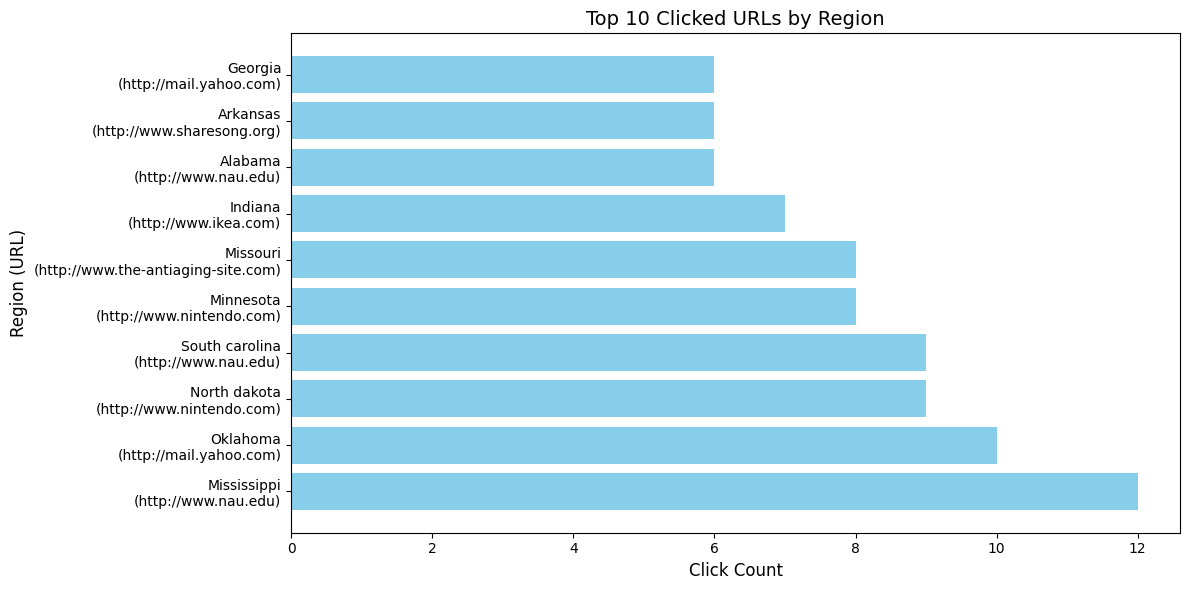

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: Horizontal Bar Chart (Clicks by Region and URL)
plt.figure(figsize=(12, 6))
plt.barh(top_domains['REGION'] + "\n(" + top_domains['URL'] + ")", 
         top_domains['CLICK_COUNT'], color='skyblue')
plt.title('Top 10 Clicked URLs by Region', fontsize=14)
plt.xlabel('Click Count', fontsize=12)
plt.ylabel('Region (URL)', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Anwender\AppData\Local\Temp\ipykernel_2820\2709906470.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[5.9 6.1]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  jittered_clicks.loc[jittered_clicks.duplicated(subset=['EVENT_TYPE', 'CLICK_COUNT'], keep=False), 'JITTERED_CLICK_COUNT'] += np.linspace(-0.1, 0.1, sum(jittered_clicks.duplicated(subset=['EVENT_TYPE', 'CLICK_COUNT'], keep=False)))


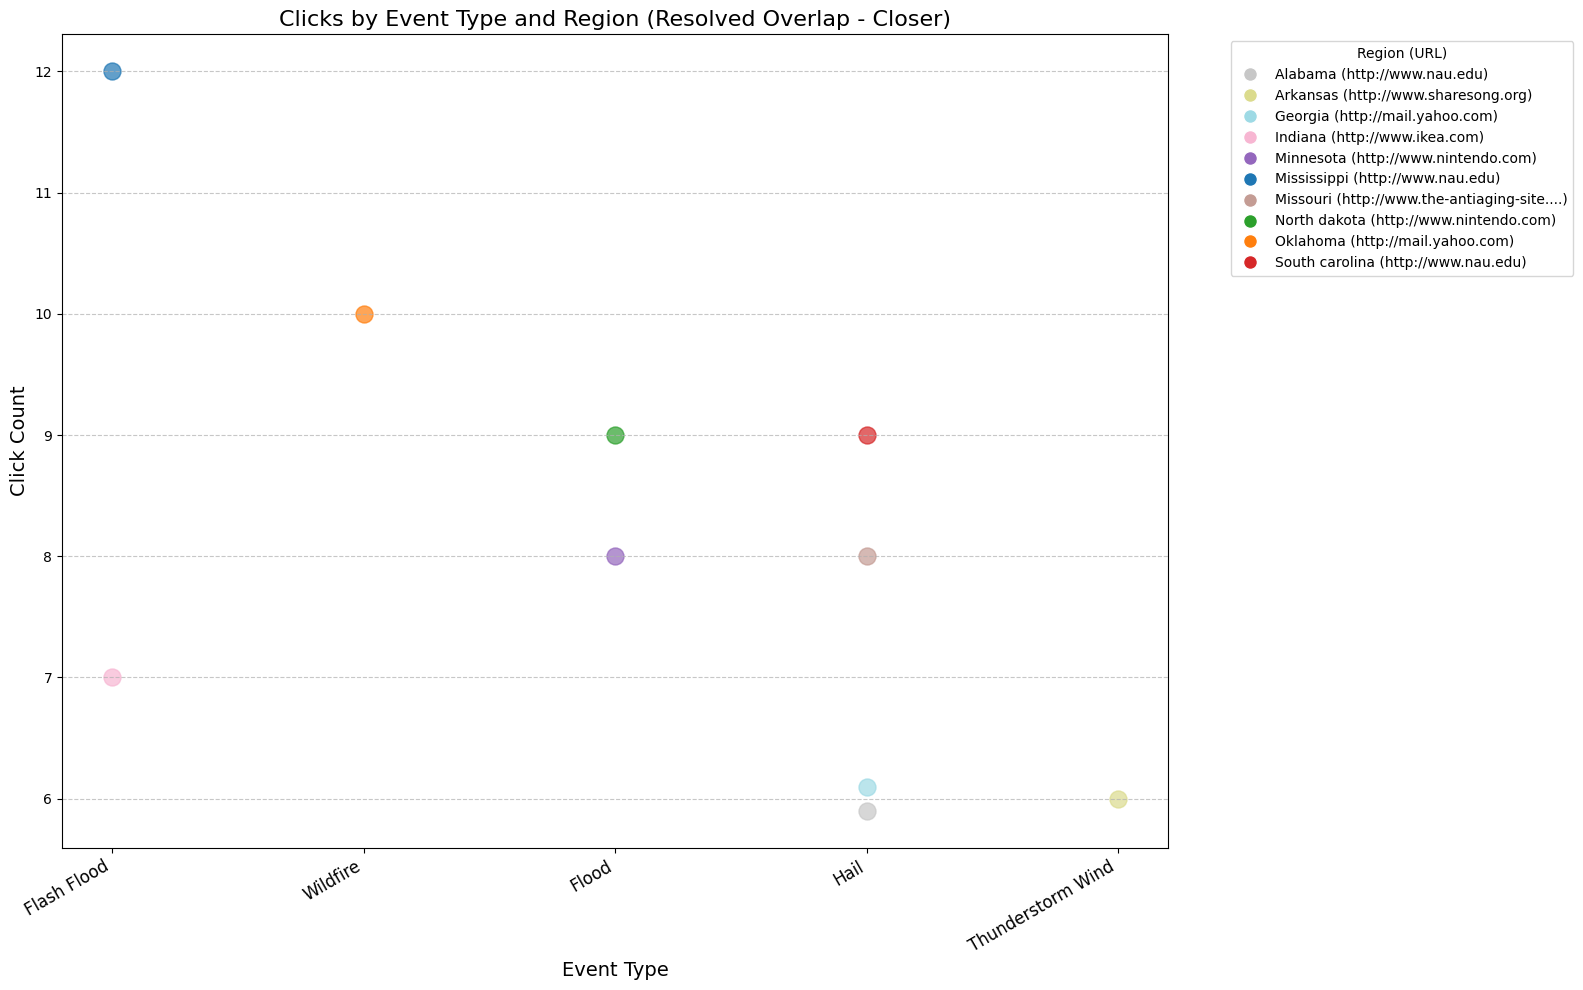

In [54]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generate a list of unique colors for each region
regions = top_domains['REGION'].unique()
colors = cm.tab20(np.linspace(0, 1, len(regions)))  # Use colormap to generate colors
region_color_map = {region: colors[i] for i, region in enumerate(regions)}  # Map each region to a unique color

# Add a small reduced offset to CLICK_COUNT for overlapping points
jittered_clicks = top_domains.copy()
jittered_clicks['JITTERED_CLICK_COUNT'] = jittered_clicks['CLICK_COUNT']
jittered_clicks.loc[jittered_clicks.duplicated(subset=['EVENT_TYPE', 'CLICK_COUNT'], keep=False), 'JITTERED_CLICK_COUNT'] += np.linspace(-0.1, 0.1, sum(jittered_clicks.duplicated(subset=['EVENT_TYPE', 'CLICK_COUNT'], keep=False)))

# Create the scatter plot
plt.figure(figsize=(16, 10))
for i, row in jittered_clicks.iterrows():
    plt.scatter(row['EVENT_TYPE'], row['JITTERED_CLICK_COUNT'], color=region_color_map[row['REGION']], s=150, alpha=0.7)

# Create the legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=region_color_map[region],
               markersize=10, label=f"{region} ({row['URL'][:30]}{'...' if len(row['URL']) > 30 else ''})")
    for region, row in jittered_clicks.groupby('REGION').first().iterrows()
]
plt.legend(handles=legend_elements, title="Region (URL)", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add titles and labels
plt.title('Clicks by Event Type and Region (Resolved Overlap - Closer)', fontsize=16)
plt.xlabel('Event Type', fontsize=14)
plt.ylabel('Click Count', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a light grid for clarity
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
query = """
SELECT
    w.EVENT_TYPE,
    AVG(CAST(f.IRANK AS DECIMAL)) AS AVG_RANK
FROM
    AOL_SCHEMA.WEATHER_EVENTS w
JOIN
    AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
WHERE
    f.CLICK = TRUE
GROUP BY w.EVENT_TYPE;
"""
# print(conn.export_to_pandas(query))
result = conn.execute(query)
for row in result:
    print(row)

('Debris Flow', 4.928571428571429)
('Storm Surge/Tide', 9.409090909090908)
('Coastal Flood', 2.0694444444444446)
('Ice Storm', 2.641025641025641)
('Heavy Snow', 5.379211878926328)
('Dust Devil', 12.5)
('Winter Weather', 5.747870528109029)
('High Surf', 1.9047619047619047)
('Blizzard', 4.150537634408602)
('High Wind', 5.2943530457981325)
('Hail', 4.667225865487265)
('Thunderstorm Wind', 4.07098121085595)
('Funnel Cloud', 4.455525606469003)
('Strong Wind', 7.840940525587828)
('Dense Fog', 2.682634730538922)
('Heat', 10.5)
('Winter Storm', 6.924403183023872)
('Flood', 4.192465192465193)
('Drought', 2.4802631578947367)
('Waterspout', 6.006756756756757)
('Sleet', 3.7777777777777777)
('Cold/Wind Chill', 6.969387755102041)
('Wildfire', 7.341040462427745)
('Marine Thunderstorm Wind', 4.544474393530997)
('Lake-Effect Snow', 7.1521739130434785)
('Rip Current', 9.454545454545455)
('Tornado', 5.457708779443255)
('WINTER WEATHER', 5.7177700348432055)
('Lightning', 3.856466876971609)
('Flash Flood',

In [9]:
query = """
SELECT
    w.REGION,
    u.SUBDOMAIN,
    COUNT(f.URLID) AS CLICK_COUNT
FROM
    AOL_SCHEMA.WEATHER_EVENTS w
JOIN
    AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
JOIN
    AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
WHERE
    f.CLICK = TRUE
GROUP BY ROLLUP(w.REGION, u.SUBDOMAIN);
"""
print(conn.export_to_pandas(query))
# result = conn.execute(query)
# for row in result:
#     print(row)

             REGION     SUBDOMAIN  CLICK_COUNT
0             Texas    teenadvice            9
1             Texas         pages           10
2             Texas           web          179
3             Texas  southernfood           10
4             Texas           360           73
..              ...           ...          ...
842        Nebraska           NaN         1223
843  Virgin islands           NaN            4
844   New hampshire           NaN          150
845         Montana           NaN          346
846             NaN           NaN        52357

[847 rows x 3 columns]


In [10]:
query = """
SELECT
    w.REGION,
    w.EVENT_TYPE,
    COUNT(f.URLID) AS TOTAL_CLICKS,
    AVG(CASE WHEN f.CLICK THEN 1 ELSE 0 END) AS CLICK_RATE
FROM
    AOL_SCHEMA.WEATHER_EVENTS w
JOIN
    AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
GROUP BY ROLLUP(w.REGION, w.EVENT_TYPE);
"""
print(conn.export_to_pandas(query))
# result = conn.execute(query)
# for row in result:
#     print(row)

             REGION         EVENT_TYPE  TOTAL_CLICKS  CLICK_RATE
0             Texas         Heavy Snow            14    0.642857
1             Texas     Winter Weather             1    1.000000
2             Texas          High Wind           346    0.604046
3             Texas               Hail          5249    0.450562
4             Texas  Thunderstorm Wind          1474    0.423338
..              ...                ...           ...         ...
761        Nebraska                NaN          2130    0.574178
762  Virgin islands                NaN             7    0.571429
763   New hampshire                NaN           284    0.528169
764         Montana                NaN           637    0.543171
765             NaN                NaN        104312    0.501927

[766 rows x 4 columns]


In [11]:
query = """
SELECT
    w.EVENT_TYPE,
    w.REGION,
    COUNT(DISTINCT u.SUBDOMAIN) AS UNIQUE_SUBDOMAINS,
    COUNT(f.URLID) AS TOTAL_CLICKS
FROM
    AOL_SCHEMA.WEATHER_EVENTS w
JOIN
    AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
JOIN
    AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
GROUP BY GROUPING SETS ((w.EVENT_TYPE, w.REGION), (w.EVENT_TYPE), (w.REGION));
"""
print(conn.export_to_pandas(query))
# result = conn.execute(query)
# for row in result:
#     print(row)

            EVENT_TYPE          REGION  UNIQUE_SUBDOMAINS  TOTAL_CLICKS
0           Heavy Snow           Texas                  2            14
1       Winter Weather           Texas                  1             1
2            High Wind           Texas                 12           346
3                 Hail           Texas                 16          5249
4    Thunderstorm Wind           Texas                 16          1474
..                 ...             ...                ...           ...
796                NaN    Pennsylvania                 16          1170
797                NaN        Nebraska                 12          2130
798                NaN  Virgin islands                  2             7
799                NaN   New hampshire                 10           284
800                NaN         Montana                 16           637

[801 rows x 4 columns]


In [14]:
query = """
SELECT
    w.REGION,
    w.EVENT_TYPE,
    u.THISDOMAIN,
    COUNT(f.URLID) AS CLICK_COUNT
FROM
    AOL_SCHEMA.WEATHER_EVENTS w
JOIN
    AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
JOIN
    AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
GROUP BY ROLLUP(w.REGION, w.EVENT_TYPE, u.THISDOMAIN);
"""
print(conn.export_to_pandas(query))
# result = conn.execute(query)
# for row in result:
#     print(row)

       REGION         EVENT_TYPE           THISDOMAIN  CLICK_COUNT
0       Texas               Hail  summitcommunitybank           86
1       Texas  Thunderstorm Wind  summitcommunitybank            7
2       Texas       Funnel Cloud  summitcommunitybank            1
3       Texas              Flood  summitcommunitybank            1
4       Texas           Wildfire  summitcommunitybank            2
...       ...                ...                  ...          ...
9781  Montana     WINTER WEATHER                  NaN           32
9782  Montana        Flash Flood                  NaN           18
9783  Montana         Heavy Rain                  NaN            6
9784  Montana          Avalanche                  NaN            7
9785      NaN                NaN                  NaN       104312

[9786 rows x 4 columns]


In [15]:
query = """
SELECT
    w.REGION,
    w.EVENT_TYPE,
    u.SUBDOMAIN,
    COUNT(f.URLID) AS CLICK_COUNT
FROM
    AOL_SCHEMA.WEATHER_EVENTS w
JOIN
    AOL_SCHEMA.FACTS f ON w.BEGIN_DAY = f.TIMEID
JOIN
    AOL_SCHEMA.URLDIM u ON f.URLID = u.ID
WHERE
    f.CLICK = TRUE
GROUP BY GROUPING SETS ((w.REGION, w.EVENT_TYPE, u.SUBDOMAIN), (w.REGION, w.EVENT_TYPE), (w.EVENT_TYPE, u.SUBDOMAIN), (w.REGION), (w.EVENT_TYPE), (u.SUBDOMAIN));
"""
print(conn.export_to_pandas(query))
# result = conn.execute(query)
# for row in result:
#     print(row)

     REGION         EVENT_TYPE   SUBDOMAIN  CLICK_COUNT
0     Texas          High Wind  teenadvice            4
1     Texas           Wildfire  teenadvice            5
2     Texas          High Wind       pages            2
3     Texas               Hail       pages            4
4     Texas  Thunderstorm Wind       pages            2
...     ...                ...         ...          ...
3872    NaN                NaN         NaN          566
3873    NaN                NaN        home          589
3874    NaN                NaN       media          566
3875    NaN                NaN     archive          566
3876    NaN                NaN    artists4          883

[3877 rows x 4 columns]


In [1]:
conn.close()

NameError: name 'conn' is not defined